In [44]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import collections

In [45]:
full_data = np.load("../data/mnist-data-hw3.npz")
data = full_data["training_data"]
data_labels = full_data["training_labels"]

In [46]:
pixel_data = data.reshape(data.shape[0], -1)
shaped_data = np.column_stack((pixel_data, data_labels))
pixel_data.shape, shaped_data.shape

((60000, 784), (60000, 785))

In [47]:
mapped_data = collections.defaultdict(list)
for i in range(10):
    # find subset of data & drop label column
    subset = shaped_data[shaped_data[:, -1] == i]
    subset = subset[:, 0:-1]
    mapped_data[i].append(subset)

    # l2 normalization and avoid dividing by 0
    l2norm = np.linalg.norm(subset, axis=1, keepdims=True) 
    l2norm_subset = subset / (l2norm + 1e-8)
    mapped_data[i].append(l2norm_subset)

    # calculate mean and covariance matrix
    mu = np.mean(l2norm_subset, axis=1, keepdims=True) 
    cov_matrix = np.cov(l2norm_subset,rowvar=False)
    mapped_data[i].append(mu)
    mapped_data[i].append(cov_matrix)


In [48]:
ones = mapped_data[1]
cov_matrix = ones[-1]
variances = np.diag(cov_matrix)
var_matrix = variances.reshape(28, 28)

Text(0.5, 1.0, 'Sample Heatmap')

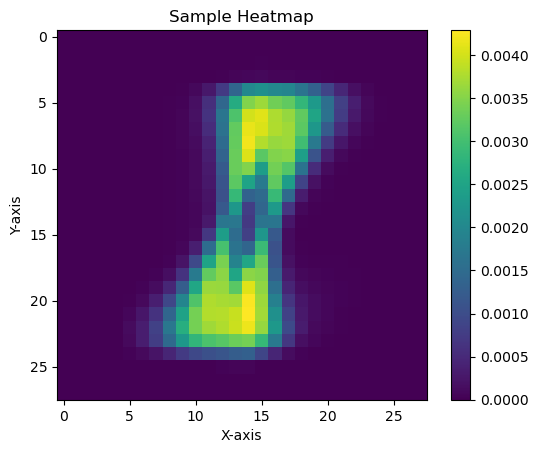

In [49]:
# Create the heatmap
plt.imshow(var_matrix, cmap='viridis')

# Add a colorbar
plt.colorbar()

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Sample Heatmap')

Text(0.5, 1.0, 'Sample Heatmap')

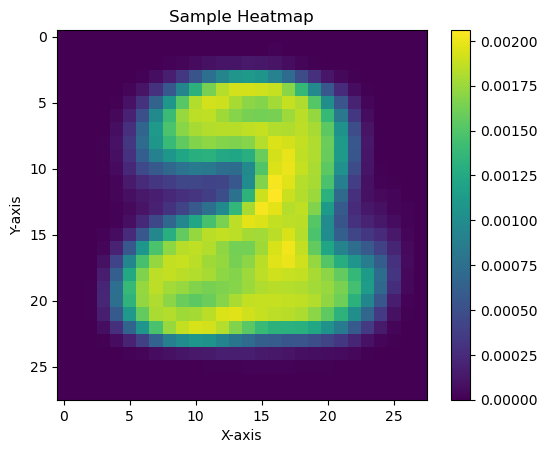

In [50]:
twos = mapped_data[2]
cov_matrix = twos[-1]
variances = np.diag(cov_matrix)
var_matrix = variances.reshape(28, 28)

# Create the heatmap
plt.imshow(var_matrix, cmap='viridis')

# Add a colorbar
plt.colorbar()

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Sample Heatmap')


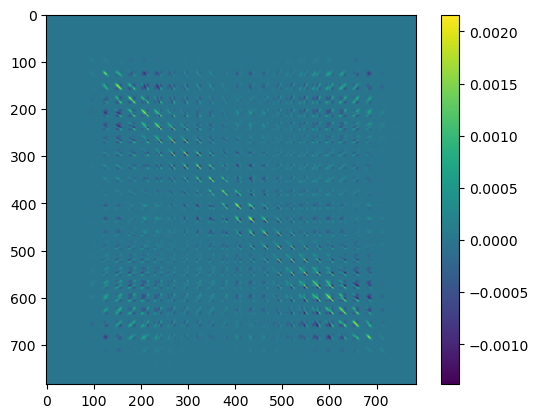

In [55]:
threes = mapped_data[3]
cov_matrix = threes[-1]
# variances = np.diag(cov_matrix)
# var_matrix = variances.reshape(28, 28)

# Create the heatmap
plt.imshow(cov_matrix, cmap='viridis')

# Add a colorbar
plt.colorbar()

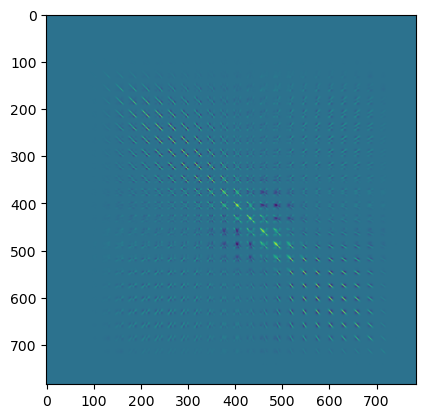

In [58]:
four = mapped_data[4]
cov_matrix = four[-1]
plt.imshow(cov_matrix,cmap='viridis')